In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import json
import os
import sys

In [2]:
# importer le fichier 
module_dir =  os.getcwd()
file_path = os.path.join(module_dir, 'data\\netflix_titles.csv') 
data = pd.read_csv(file_path)
print(f'le dataset a la forme {data.shape} et de taille {data.size}')

le dataset a la forme (6234, 12) et de taille 74808


In [5]:
# Information sur les valeur null
# Obtenir le nombre de valeur null
emptyValues = pd.isnull(data).sum()
count  = emptyValues.sum()
emptyValues

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
#Supprimer toute les lignes qui ont des valeurs nulle 
data = data.dropna()
print(f'la taille apres la suppression est {data.size}')

la taille apres la suppression est 45288


In [7]:
#Changer les saison en duree moyenne
data['duration'].replace(['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons'],['300','600','900','1200','1500','1800','2100','2400','2700','3000','3300','3600','3900'],inplace=True)

In [8]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,2100,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,1200,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,600,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,1200,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [9]:
# drop string in values and get only integer value
data['duration'] = data['duration'].str.replace(r'\D', '')

In [10]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
#verifier si la colonne duration est de type string
is_string_dtype(data['duration'])

True

In [12]:
#verifier si la colonne duration est de type integer
is_numeric_dtype(data['duration'])

False

In [15]:
#changer la colonne string to integer
data['duration'] = pd.to_numeric(data['duration'])
is_numeric_dtype(data['duration'])


True

In [16]:
import matplotlib.pyplot as plt

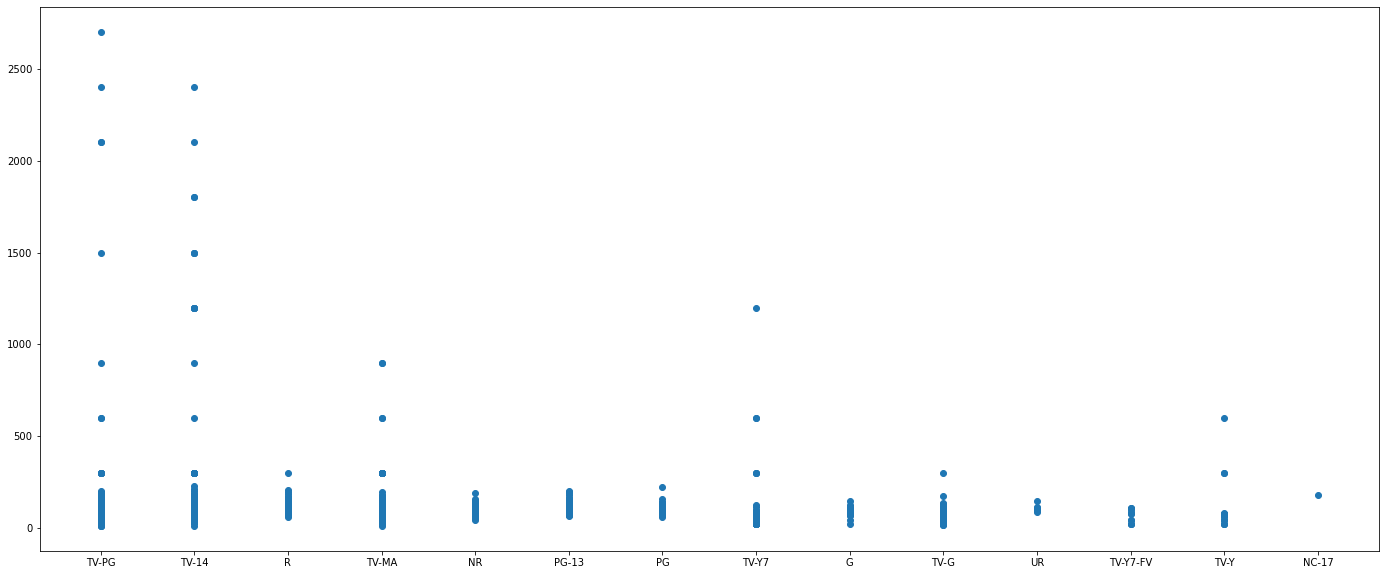

In [18]:

plt.figure(figsize=(24,10))
x = data['rating']
y = data['duration']
plt.scatter(x,y)
plt.show()

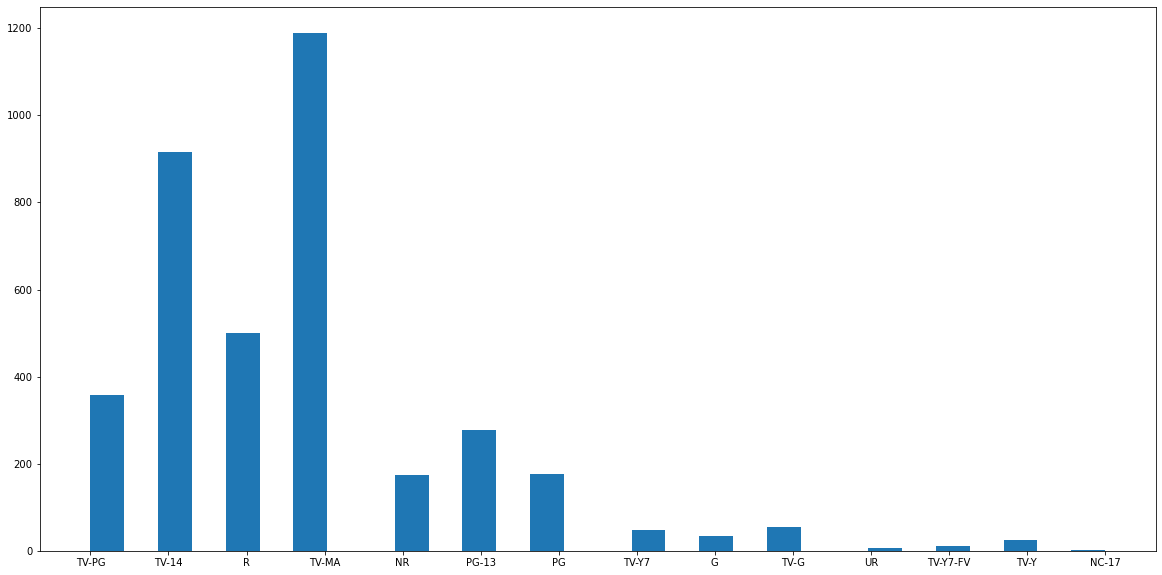

In [20]:
plt.figure(figsize=(20,10))
plt.hist(x,bins=30)
plt.show()

Text(0, 0.5, 'duration')

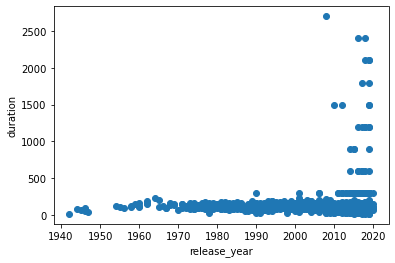

In [25]:
A = data['release_year']
B = data['duration']
plt.scatter(A,B)
plt.xlabel('release_year')
plt.ylabel('duration')

In [39]:
is_numeric_dtype(data['duration'])

True